In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display
import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Libraries
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, PrecisionRecallDisplay, auc
from sklearn.preprocessing import LabelEncoder


In [2]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_train.csv')
unseentest=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_test.csv')

ID = train.pop('id')

In [4]:
train.shape

(990, 193)

In [87]:
# Keras Libraries for Neural Networks

from keras.models import Sequential
from keras.layers import merge
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

NEURAL NETWORK

In [7]:
# Since the labels are textual, so we encode them categorically

y = train.pop('species')
y = LabelEncoder().fit(y).transform(y)
print(y.shape)

(990,)


In [8]:
# Most of the learning algorithms are prone to feature scaling
# Standardising the data to give zero mean =)
from sklearn import preprocessing

X = preprocessing.MinMaxScaler().fit(train).transform(train)
X = StandardScaler().fit(train).transform(train)
# normalizing does not help here; l1 and l2 allowed
# X = preprocessing.normalize(train, norm='l1')
print(X.shape)
X

(990, 192)


array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

In [9]:
#categorical crossentropy function
#further convert the labels into "one-hot" representation
from keras import utils as np_utils
y_cat = to_categorical(y)
print(y_cat.shape)
print(y_cat)

(990, 99)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
# retain class balances
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=1)
train_index, val_index = next(iter(sss.split(X, y)))
x_train, x_val = X[train_index], X[val_index]
y_train, y_val = y_cat[train_index], y_cat[val_index]
print("x_train dim: ",x_train.shape)
print("x_val dim:   ",x_val.shape)

x_train dim:  (792, 192)
x_val dim:    (198, 192)


In [11]:
print(y_train.shape)

(792, 99)


In [12]:
# Developing a layered model for Neural Networks
# Input dimensions should be equal to the number of features
# We used softmax layer to predict a uniform probabilistic distribution of outcomes
# https://keras.io/initializations/ ;glorot_uniform, glorot_normal, lecun_uniform, orthogonal,he_normal

model = Sequential()
model.add(Dense(768,input_dim=192,  kernel_initializer='glorot_normal', activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(768, activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

In [13]:
# Error is measured as categorical crossentropy or multiclass logloss
# Adagrad, rmsprop, SGD, Adadelta, Adam, Adamax, Nadam

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])

In [14]:
# Fitting the model on the whole training data with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(x_train, y_train,batch_size=192,epochs=2500 ,verbose=0,
                    validation_data=(x_val, y_val),callbacks=[early_stopping])

In [15]:
# we need to consider the loss for final submission to leaderboard
# print(history.history.keys())
print('val_accuracy: ',max(history.history['val_accuracy']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['accuracy']))
print('train_loss: ',min(history.history['loss']))

print()
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

val_accuracy:  0.9949495196342468
val_loss:  0.018519185483455658
train_acc:  1.0
train_loss:  4.139210219022971e-08

train/val loss ratio:  2.235093018923961e-06


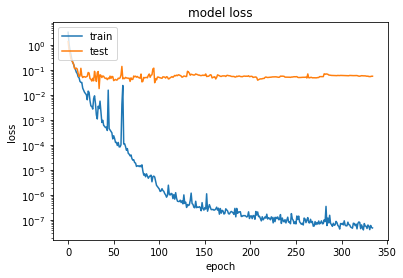

In [16]:
# summarize history for loss
# Plotting the loss with the number of iterations
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

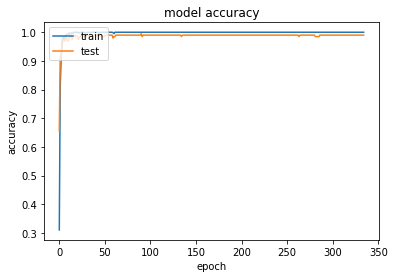

In [17]:
# Plotting the error with the number of iterations
# With each iteration the error reduces smoothly
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# read test file
unseentest=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_test.csv')
index = unseentest.pop('id')

# we need to perform the same transformations from the training set to the test set
unseentest = preprocessing.MinMaxScaler().fit(unseentest).transform(unseentest)
unseentest = StandardScaler().fit(unseentest).transform(unseentest)
yPred = model.predict(unseentest)

In [19]:
yPred

array([[4.1566934e-13, 1.9280147e-14, 5.7850498e-20, ..., 1.5511591e-16,
        3.7094185e-11, 7.2815365e-19],
       [1.6487832e-16, 1.7165116e-16, 7.1915316e-15, ..., 1.0143819e-13,
        1.9322224e-18, 5.5981005e-15],
       [3.6847548e-12, 9.9984694e-01, 8.7172951e-12, ..., 4.0094889e-15,
        5.0572529e-13, 1.5239999e-08],
       ...,
       [1.9163936e-13, 2.5950360e-14, 2.1705770e-13, ..., 2.8076779e-12,
        4.7823148e-14, 5.1124198e-13],
       [1.2227079e-13, 4.7312783e-15, 7.6340946e-13, ..., 1.3652180e-14,
        1.3386476e-16, 3.4789888e-16],
       [5.0486456e-18, 2.9425167e-12, 2.3533711e-14, ..., 2.3706798e-18,
        2.0695991e-17, 1.5524638e-13]], dtype=float32)

In [20]:
#Converting the test predictions in a dataframe as depicted by sample submission
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_train.csv')

In [21]:
#Converting the test predictions in a dataframe as depicted by sample submission
yPred_df = pd.DataFrame(yPred,index=index,columns=sorted(train.species.unique()))
print(yPred_df.head())

    Acer_Capillipes  ...  Zelkova_Serrata
id                   ...                 
4      4.156693e-13  ...     7.281537e-19
7      1.648783e-16  ...     5.598100e-15
9      3.684755e-12  ...     1.524000e-08
12     4.733211e-15  ...     3.635233e-06
13     2.199109e-14  ...     1.521650e-16

[5 rows x 99 columns]


In [22]:
yPred_df.to_csv('/content/drive/MyDrive/Colab Notebooks/leaf_submission.csv')

Convolutional Neural Network 1D

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_test.csv')

def encode(train, test):
    label_encoder = LabelEncoder().fit(train.species)
    labels = label_encoder.transform(train.species)
    classes = list(label_encoder.classes_)

    train = train.drop(['species', 'id'], axis=1)
    test = test.drop('id', axis=1)

    return train, labels, test, classes

train, labels, test, classes = encode(train, test)

# standardize train features
scaler = StandardScaler().fit(train.values)
scaled_train = scaler.transform(train.values)

# split train data into train and validation
sss = StratifiedShuffleSplit(test_size=0.1, random_state=23)
for train_index, valid_index in sss.split(scaled_train, labels):
    X_train, X_valid = scaled_train[train_index], scaled_train[valid_index]
    y_train, y_valid = labels[train_index], labels[valid_index]
    

nb_features = 64 # number of features per features type (shape, texture, margin)   
nb_class = len(classes)

# reshape train data
X_train_r = np.zeros((len(X_train), nb_features, 3))
X_train_r[:, :, 0] = X_train[:, :nb_features]
X_train_r[:, :, 1] = X_train[:, nb_features:128]
X_train_r[:, :, 2] = X_train[:, 128:]

# reshape validation data
X_valid_r = np.zeros((len(X_valid), nb_features, 3))
X_valid_r[:, :, 0] = X_valid[:, :nb_features]
X_valid_r[:, :, 1] = X_valid[:, nb_features:128]
X_valid_r[:, :, 2] = X_valid[:, 128:]

# Keras model with one Convolution1D layer
# unfortunately more number of covnolutional layers, filters and filters lenght 
# don't give better accuracy
model = Sequential()
model.add(Convolution1D(filters=512, kernel_size=3, input_shape=(nb_features, 3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(nb_class))
model.add(Activation('softmax'))


y_train = np_utils.to_categorical(y_train, nb_class)
y_valid = np_utils.to_categorical(y_valid, nb_class)

sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

nb_epoch = 3
model.fit(X_train_r, y_train, epochs=nb_epoch, validation_data=(X_valid_r, y_valid), batch_size=16)

Epoch 1/3
56/56 [==============================] - 44s 772ms/step - loss: 3.7198 - accuracy: 0.2256 - val_loss: 1.5897 - val_accuracy: 0.6566
Epoch 2/3
56/56 [==============================] - 43s 764ms/step - loss: 0.8316 - accuracy: 0.8272 - val_loss: 0.3361 - val_accuracy: 0.9091
Epoch 3/3
56/56 [==============================] - 43s 760ms/step - loss: 0.1701 - accuracy: 0.9574 - val_loss: 0.2398 - val_accuracy: 0.9293


In [58]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_train.csv')
yPredtrain_cnn1d = model.predict(X_valid_r)
yPredtrain_cnn1d

print(y_valid.shape)
print(yPredtrain_cnn1d.shape)

(99, 99)
(99, 99)


In [59]:
roc_auc_score(y_valid,yPredtrain_cnn1d, multi_class="ovr")

0.9998969284683571

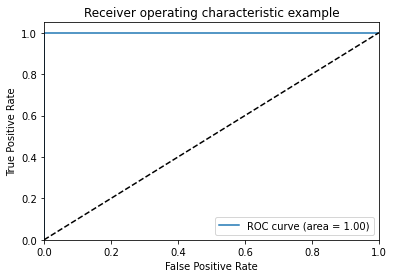

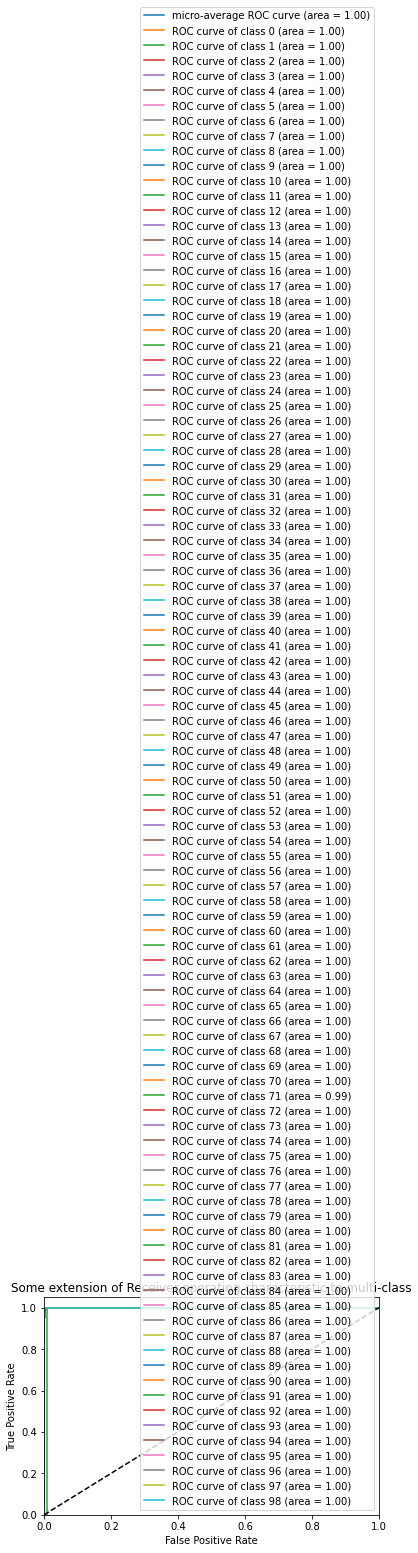

In [56]:
# Compute ROC curve and ROC area for each class
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_train.csv')
y=train['species'].values

n_classes=99

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid[:, i], yPredtrain_cnn1d[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_valid.ravel(), yPredtrain_cnn1d.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

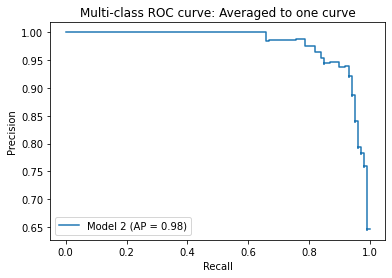

In [63]:
precision = dict()
recall=dict()
average_precision=dict()
for i in range(99): #range of different categories
  precision[i],recall[i],_ = precision_recall_curve(y_valid[:,i],yPredtrain_cnn1d[:,i])
  average_precision[i] = average_precision_score(y_valid[:, i], yPredtrain_cnn1d[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"],recall["micro"],_ = precision_recall_curve(y_valid.ravel(),yPredtrain_cnn1d.ravel())

average_precision["micro"] = average_precision_score(y_valid, yPredtrain_cnn1d, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
    estimator_name='Model 2'
)
display.plot()
_ = display.ax_.set_title("Multi-class ROC curve: Averaged to one curve")

In [27]:
# standardize test features for KAGGLE SUBMISSION
scaler = StandardScaler().fit(test.values)
scaled_test = scaler.transform(test.values)
scaled_test
# reshape test data
X_test_r = np.zeros((len(scaled_test), nb_features, 3))
X_test_r[:, :, 0] = scaled_test[:, :nb_features]
X_test_r[:, :, 1] = scaled_test[:, nb_features:128]
X_test_r[:, :, 2] = scaled_test[:, 128:]


In [28]:
yPred_cnn1d = model.predict(X_test_r)

In [29]:
yPred_cnn1d

array([[8.50169556e-07, 1.73430536e-07, 6.03465935e-08, ...,
        2.14859397e-09, 7.79433321e-06, 1.01367704e-07],
       [1.08206405e-06, 5.81108952e-06, 1.93410960e-05, ...,
        9.85073075e-06, 1.90195976e-06, 7.87704630e-06],
       [5.51739413e-06, 9.80868816e-01, 1.65391646e-06, ...,
        4.46917845e-08, 1.96628307e-07, 1.09068700e-03],
       ...,
       [1.77957027e-05, 4.59501553e-06, 4.67042412e-07, ...,
        3.66770578e-08, 4.49436527e-07, 8.59703578e-05],
       [1.72626287e-07, 3.87239623e-07, 1.22108104e-04, ...,
        7.88803121e-08, 5.91365641e-08, 5.45448984e-07],
       [2.21250872e-07, 9.91404158e-06, 1.26318468e-04, ...,
        9.69740412e-08, 3.55049337e-07, 1.65093134e-05]], dtype=float32)

In [30]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_train.csv')
yPred_cnn1d_df = pd.DataFrame(yPred_cnn1d,index=index,columns=sorted(train.species.unique()))

In [31]:
yPred_cnn1d_df.to_csv('/content/drive/MyDrive/Colab Notebooks/submissionleafcnn.csv')

Convolutional NN: 1D, max pooling

In [64]:
# Function to create model, required for KerasClassifier
def create_model():
	# create model
  model = Sequential()
  model.add(Convolution1D(768, kernel_size=5, padding='same', strides=2, activation='relu', input_shape=(nb_features, 3)))
  model.add(MaxPool1D(pool_size=2))
  model.add(Dropout(0.4))
  model.add(Convolution1D(768, kernel_size=5, padding='same', strides=2, activation='relu'))
  model.add(MaxPool1D(pool_size=2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(99, activation='softmax'))
  #Compile model
  sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
  return model

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model,verbose=2)

In [68]:
batch_size=[10,20,40,60,80,100]
epochs = [15]
param_grid = dict(batch_size = batch_size, epochs = epochs)

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, Activation, BatchNormalization, MaxPooling2D,LeakyReLU, Convolution1D, Convolution2D, MaxPool1D, AveragePooling1D
rand = RandomizedSearchCV(estimator = model, param_distributions=param_grid, n_jobs = -1, cv = 2, error_score = "raise")
rand_result = rand.fit(X_train_r, y_train)

Epoch 1/15
90/90 - 13s - loss: 4.1856 - accuracy: 0.0898 - 13s/epoch - 144ms/step
Epoch 2/15
90/90 - 12s - loss: 2.0232 - accuracy: 0.5230 - 12s/epoch - 134ms/step
Epoch 3/15
90/90 - 12s - loss: 0.5876 - accuracy: 0.8698 - 12s/epoch - 136ms/step
Epoch 4/15
90/90 - 12s - loss: 0.2636 - accuracy: 0.9293 - 12s/epoch - 135ms/step
Epoch 5/15
90/90 - 12s - loss: 0.1470 - accuracy: 0.9708 - 12s/epoch - 135ms/step
Epoch 6/15
90/90 - 12s - loss: 0.1000 - accuracy: 0.9753 - 12s/epoch - 134ms/step
Epoch 7/15
90/90 - 12s - loss: 0.0897 - accuracy: 0.9832 - 12s/epoch - 135ms/step
Epoch 8/15
90/90 - 12s - loss: 0.0694 - accuracy: 0.9888 - 12s/epoch - 137ms/step
Epoch 9/15
90/90 - 12s - loss: 0.0324 - accuracy: 0.9921 - 12s/epoch - 133ms/step
Epoch 10/15
90/90 - 12s - loss: 0.0472 - accuracy: 0.9899 - 12s/epoch - 138ms/step
Epoch 11/15
90/90 - 12s - loss: 0.0336 - accuracy: 0.9944 - 12s/epoch - 134ms/step
Epoch 12/15
90/90 - 12s - loss: 0.0285 - accuracy: 0.9933 - 12s/epoch - 136ms/step
Epoch 13/15
9

In [81]:
best_est_cnn = rand.best_estimator_
best_est_cnn

print("best: %f using %s" % (rand_result.best_score_,rand_result.best_params_))
means = rand_result.cv_results_['mean_test_score']
stds = rand_result.cv_results_['std_test_score']
params=rand_result.cv_results_['params']

for mean, stdev,param in zip(means,stds,params):
  print("%f (%F) with: %r" % (mean,stdev,params))

best: 0.887746 using {'epochs': 15, 'batch_size': 10}
0.224525 (0.051879) with: [{'epochs': 5, 'batch_size': 40}, {'epochs': 15, 'batch_size': 80}, {'epochs': 10, 'batch_size': 80}, {'epochs': 15, 'batch_size': 40}, {'epochs': 5, 'batch_size': 20}, {'epochs': 15, 'batch_size': 60}, {'epochs': 10, 'batch_size': 40}, {'epochs': 10, 'batch_size': 20}, {'epochs': 15, 'batch_size': 10}, {'epochs': 5, 'batch_size': 60}]
0.619522 (0.006039) with: [{'epochs': 5, 'batch_size': 40}, {'epochs': 15, 'batch_size': 80}, {'epochs': 10, 'batch_size': 80}, {'epochs': 15, 'batch_size': 40}, {'epochs': 5, 'batch_size': 20}, {'epochs': 15, 'batch_size': 60}, {'epochs': 10, 'batch_size': 40}, {'epochs': 10, 'batch_size': 20}, {'epochs': 15, 'batch_size': 10}, {'epochs': 5, 'batch_size': 60}]
0.301917 (0.008195) with: [{'epochs': 5, 'batch_size': 40}, {'epochs': 15, 'batch_size': 80}, {'epochs': 10, 'batch_size': 80}, {'epochs': 15, 'batch_size': 40}, {'epochs': 5, 'batch_size': 20}, {'epochs': 15, 'batch_s

In [82]:
model = Sequential()
model.add(Convolution1D(768, kernel_size=5, padding='same', strides=2, activation='relu', input_shape=(nb_features, 3)))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Convolution1D(768, kernel_size=5, padding='same', strides=2, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(99, activation='softmax'))

sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model.fit(X_train_r, y_train, epochs=15, validation_data=(X_valid_r, y_valid), batch_size=10)

Epoch 1/15
90/90 [==============================] - 12s 128ms/step - loss: 4.1866 - accuracy: 0.0662 - val_loss: 3.3852 - val_accuracy: 0.1111
Epoch 2/15
90/90 [==============================] - 11s 126ms/step - loss: 1.9862 - accuracy: 0.5634 - val_loss: 1.0363 - val_accuracy: 0.7677
Epoch 3/15
90/90 [==============================] - 11s 126ms/step - loss: 0.5763 - accuracy: 0.8530 - val_loss: 0.4925 - val_accuracy: 0.8586
Epoch 4/15
90/90 [==============================] - 11s 126ms/step - loss: 0.3393 - accuracy: 0.9282 - val_loss: 0.4516 - val_accuracy: 0.9192
Epoch 5/15
90/90 [==============================] - 11s 127ms/step - loss: 0.1696 - accuracy: 0.9675 - val_loss: 0.4068 - val_accuracy: 0.9293
Epoch 6/15
90/90 [==============================] - 11s 125ms/step - loss: 0.1084 - accuracy: 0.9776 - val_loss: 0.2371 - val_accuracy: 0.9495
Epoch 7/15
90/90 [==============================] - 11s 127ms/step - loss: 0.0737 - accuracy: 0.9809 - val_loss: 0.2117 - val_accuracy: 0.9293

In [83]:
ypredcnn = model.predict(X_test_r)
ypredcnn

array([[8.6274333e-08, 5.0401732e-09, 1.5015854e-10, ..., 3.5022405e-11,
        6.4515448e-06, 2.5459679e-08],
       [6.0231815e-07, 2.2352660e-08, 1.5387152e-05, ..., 5.8381294e-05,
        8.2094189e-09, 2.3808791e-06],
       [5.5978282e-05, 7.8673357e-01, 5.3745325e-06, ..., 4.1806871e-08,
        2.0049164e-07, 2.0810529e-03],
       ...,
       [9.8594674e-06, 1.9541173e-07, 1.1595546e-08, ..., 1.2652581e-08,
        6.3074594e-08, 1.1136902e-05],
       [4.1627021e-10, 6.5322459e-10, 3.1778143e-08, ..., 3.1383884e-09,
        6.2620352e-13, 1.5612413e-08],
       [7.7713217e-08, 9.5132675e-09, 7.0990427e-07, ..., 1.6498969e-06,
        9.8810737e-08, 4.3946449e-05]], dtype=float32)

In [86]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/leaf_train.csv')
ypredcnn_df = pd.DataFrame(ypredcnn,index=index,columns=sorted(train.species.unique()))

ypredcnn_df.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_ypredcnn_maxpool.csv')